Topic #0: edu, space, com, mail, available, information, ftp, use, data, list

Topic #1: israel, health, research, medical, israeli, 1993, study, national, years, april

Topic #2: god, people, jesus, does, believe, say, know, bible, christian, church

Topic #3: just, like, don, know, good, time, think, ve, got, really

Topic #4: armenian, people, armenians, turkish, jews, said, war, russian, history, turkey

Topic #5: ax, max, g9v, b8f, a86, pl, 145, 1d9, db, 34u

Topic #6: key, chip, encryption, clipper, keys, use, security, phone, government, privacy

Topic #7: people, don, think, right, just, like, know, make, government, mr

Topic #8: windows, use, dos, drive, file, does, card, thanks, software, pc

Topic #9: 00, 10, 25, 20, 15, 12, 11, 16, 17, 50



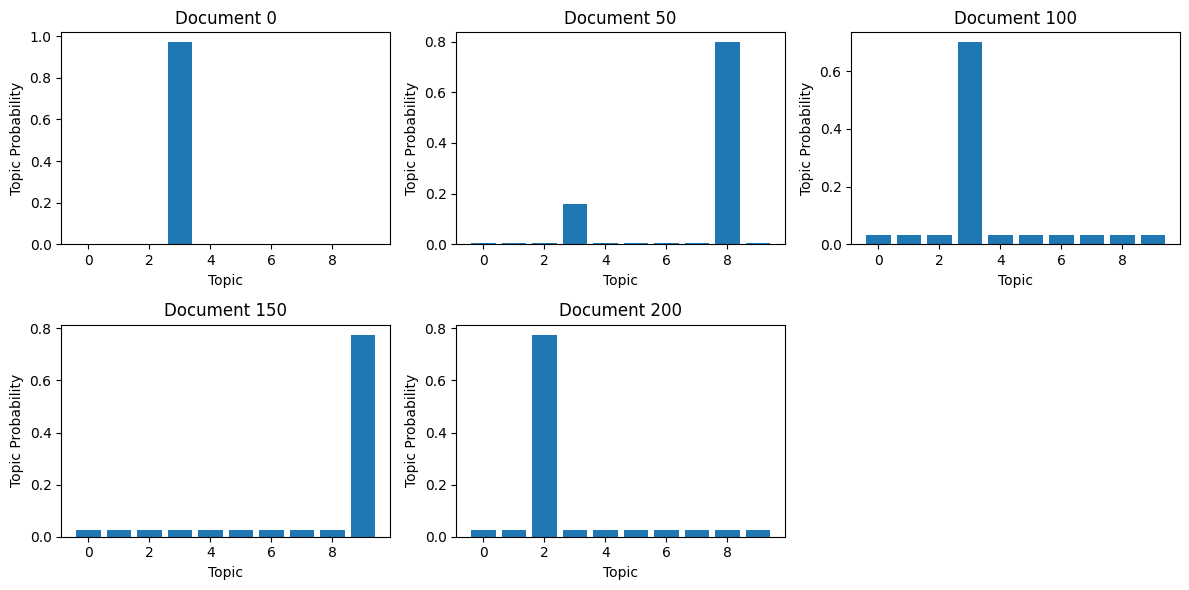

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

# Load the 20 Newsgroups dataset (a collection of newsgroup documents)
newsgroups_data = fetch_20newsgroups(subset='all', shuffle=True, remove=('headers', 'footers', 'quotes'))

# Convert the text data into a document-term matrix
vectorizer = CountVectorizer(max_features=1000, stop_words='english')
X = vectorizer.fit_transform(newsgroups_data.data)

# Apply LDA to extract topics
n_topics = 10  # Number of topics to extract
lda = LatentDirichletAllocation(n_components=n_topics, random_state=42)
lda.fit(X)

# Display the top words for each topic
feature_names = np.array(vectorizer.get_feature_names_out())
for topic_idx, topic in enumerate(lda.components_):
    top_words_idx = topic.argsort()[::-1][:10]
    top_words = feature_names[top_words_idx]
    print(f"Topic #{topic_idx}: {', '.join(top_words)}\n")

# Visualize the topic-document distribution for a few documents
document_topic_distribution = lda.transform(X)
sample_document_indices = [0, 50, 100, 150, 200]  # Indices of sample documents to visualize
plt.figure(figsize=(12, 6))
for i, doc_index in enumerate(sample_document_indices):
    plt.subplot(2, 3, i + 1)
    plt.bar(range(n_topics), document_topic_distribution[doc_index])
    plt.title(f"Document {doc_index}")
    plt.xlabel("Topic")
    plt.ylabel("Topic Probability")
plt.tight_layout()
plt.show()
